In [ ]:
# 使用するライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
# Google Colaboratoryでファイルをアップロード
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
# データフレームとして、変数dfに3列×10000行のデータを格納
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df

,x1,x2,y
0,0.1,0.01,3.221500e-02
1,0.2,0.01,3.141500e-02
2,0.3,0.01,2.749700e-02
3,0.4,0.01,2.300000e-02
4,0.5,0.01,1.855400e-02
...,...,...,...
9995,9.6,1.00,5.240000e-14
9996,9.7,1.00,3.690000e-14
9997,9.8,1.00,2.040000e-14
9998,9.9,1.00,8.880000e-16


In [ ]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

In [ ]:
# x_train, x_testではcsvファイルの1列目から2列目を，y_train, y_testでは3列目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2]]

In [ ]:
# モデルの構築
# inputの数
n_in = 2

# ノードの数
n_hidden = 16

# outputの数
n_out = 1

# 学習回数
epochs = 50
batch_size = 64

model = Sequential()
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(units=n_out))
model.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 学習オプション
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/50
125/125 [==============================] - 3s 4ms/step - loss: 0.8257 - val_loss: 0.6813
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.5671 - val_loss: 0.4440
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3965 - val_loss: 0.3284
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.3173 - val_loss: 0.2743
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2802 - val_loss: 0.2413
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2512 - val_loss: 0.2132
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2191 - val_loss: 0.1978
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1893 - val_loss: 0.1529
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1398
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1255 - val_loss: 0.0985

In [ ]:
# 構築したモデルで予測
test_predict = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
#精度評価指標
# MAE
test_MAE = mean_absolute_error(y_test, test_predict)
print('MAE：', test_MAE)

# MSE
test_MSE = mean_squared_error(y_test, test_predict)
print('MSE：', test_MSE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test, test_predict))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test, test_predict)
print('R2：', R2)

MAE： 0.04479787766602013
MSE： 0.0036005667768078194
RMSE： 0.06000472295417936
R2： 0.9973465277374357


# 逆解析の実装
所望のyを設定して、それを実現するx1, x2を探索していく）

In [ ]:
import tensorflow as tf

# 出力パラメータの所望値を設定
target_y = tf.constant([4.0], dtype=tf.float32)

# 初期の入力値をランダムに設定（x1は0から10の範囲、x2は0から1の範囲に制限）
x1 = tf.Variable(tf.random.uniform([1], 0, 10))
x2 = tf.Variable(tf.random.uniform([1], 0, 1))

# 最適化手法を定義
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 各値を保存するリスト
x1_values = []
x2_values = []
predicted_y_values = []

# 損失関数の値を保存するリスト
loss_values = []

# 学習回数
step = 1000

# 学習を実行
for step in range(step):
    # 勾配計算を行うためのAPI
    with tf.GradientTape() as tape:

        # モデルの出力を定義(予測値を計算)
        predicted_y = model(tf.stack([x1, x2], axis=1))
        # 損失関数を定義（予測値と目標値の二乗誤差を計算）
        loss = tf.reduce_mean(tf.square(predicted_y - target_y))

    # 勾配を計算(損失に対する各パラメータx1とx2の勾配を計算)
    gradients = tape.gradient(loss, [x1, x2])
    # 最適化手法を適用(計算された勾配を使用してパラメータx1とx2を更新)
    optimizer.apply_gradients(zip(gradients, [x1, x2]))

    # 各値を保存
    x1_values.append(x1.numpy()[0])
    x2_values.append(x2.numpy()[0])
    predicted_y_values.append(predicted_y.numpy()[0])

    # 損失関数の値を保存
    loss_values.append(loss.numpy())

    # 10ステップごとに結果を出力
    if step % 10 == 0:
        print(f'Epoch: {step}, Loss: {loss.numpy()}, x1: {x1.numpy()}, x2: {x2.numpy()}')

# 最終的な学習結果を出力(x1とx2のパラメータ)
print(f'Loss: {loss.numpy()}, x1: {x1.numpy()}, x2: {x2.numpy()}')

Epoch: 0, Loss: 1.236134648323059, x1: [6.0287695], x2: [0.20212668]
Epoch: 10, Loss: 0.824766218662262, x1: [6.1262474], x2: [0.283269]
Epoch: 20, Loss: 0.750572144985199, x1: [6.2180495], x2: [0.27210754]
Epoch: 30, Loss: 0.6458324790000916, x1: [6.3095374], x2: [0.24989429]
Epoch: 40, Loss: 0.583787739276886, x1: [6.4008183], x2: [0.25183663]
Epoch: 50, Loss: 0.5236064791679382, x1: [6.4899335], x2: [0.24945405]
Epoch: 60, Loss: 0.4724300801753998, x1: [6.576812], x2: [0.24726407]
Epoch: 70, Loss: 0.4219900965690613, x1: [6.66139], x2: [0.24370356]
Epoch: 80, Loss: 0.38013356924057007, x1: [6.743701], x2: [0.2409978]
Epoch: 90, Loss: 0.3386421501636505, x1: [6.8238406], x2: [0.23937513]
Epoch: 100, Loss: 0.30301418900489807, x1: [6.901717], x2: [0.23996778]
Epoch: 110, Loss: 0.26965785026550293, x1: [6.9769087], x2: [0.23821868]
Epoch: 120, Loss: 0.23627138137817383, x1: [7.049363], x2: [0.234627]
Epoch: 130, Loss: 0.20984214544296265, x1: [7.1194196], x2: [0.23381254]
Epoch: 140, L

In [ ]:
# 逆解析で得た入力パラメータをもとにyの結果を得る
predicted_value = model.predict(np.array([[8.2133255, 0.20969264]]))

# yを確認（所望するyの値は4）
print("逆解析によって得られた入力パラメータによるyの値は：", predicted_value[0][0])

1/1 [==============================] - 0s 36ms/step
逆解析によって得られた入力パラメータによるyの値は： 3.999995


# 結果の可視化
x1, x2のパラメータが変化することによってLossが減っていることがわかる

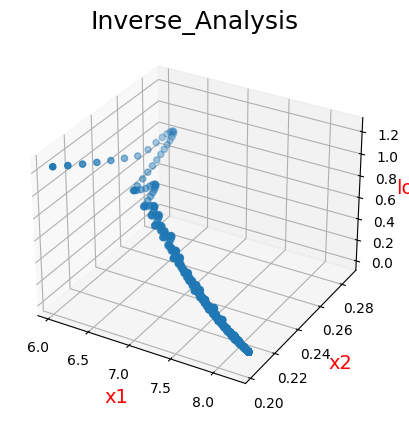

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# x,y,zに要素追加
x = np.array(x1_values)
y = np.array(x2_values)
z = np.array(loss_values)

# scipy.interpolate.griddata() でサンプリングしなおす
x_new, y_new = np.meshgrid(np.linspace(x.min(), x.max(), len(x)), np.linspace(y.min(), y.max(), len(y)))
z_new = griddata((x, y), z, (x_new, y_new), method='linear')

# Figureを追加
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Axesのタイトルを設定
ax.set_title("Inverse_Analysis", size = 18)
# 軸ラベルを設定
ax.set_xlabel("x1", size = 14, color = "r")
ax.set_ylabel("x2", size = 14, color = "r")
ax.set_zlabel("loss", size = 14, color = "r")
ax.scatter(x1_values, x2_values, loss_values)
plt.show()